In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/kaggle/input/openintro-possum/possum.csv')
data

In [3]:
data.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [4]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
data['case']

0        1
1        2
2        3
3        4
4        5
      ... 
99     100
100    101
101    102
102    103
103    104
Name: case, Length: 104, dtype: int64

In [7]:
data.shape

(104, 14)

<Axes: xlabel='hdlngth', ylabel='skullw'>

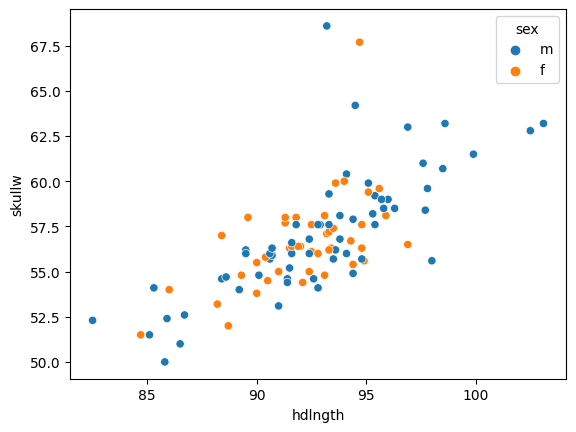

In [8]:
import seaborn as sns
sns.scatterplot(data=data,x="hdlngth",y="skullw",hue="sex")

In [9]:
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [10]:
data['Pop'].unique()

array(['Vic', 'other'], dtype=object)

In [11]:
data['Pop'] = data['Pop'].replace({'Vic':0,'other':1})

<ipython-input-11-e01441bc7558>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Pop'] = data['Pop'].replace({'Vic':0,'other':1})


In [12]:
data['Pop'] = data['Pop'].astype('float64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    float64
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 11.5+ KB


In [14]:
data['sex'] = data['sex'].replace({'m':1,'f':2}).astype('float64')

<ipython-input-14-02b51173b0c3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'m':1,'f':2}).astype('float64')


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    float64
 3   sex       104 non-null    float64
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 11.5 KB


In [16]:
data.drop(['case','site'],axis=1,inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       104 non-null    float64
 1   sex       104 non-null    float64
 2   age       102 non-null    float64
 3   hdlngth   104 non-null    float64
 4   skullw    104 non-null    float64
 5   totlngth  104 non-null    float64
 6   taill     104 non-null    float64
 7   footlgth  103 non-null    float64
 8   earconch  104 non-null    float64
 9   eye       104 non-null    float64
 10  chest     104 non-null    float64
 11  belly     104 non-null    float64
dtypes: float64(12)
memory usage: 9.9 KB


<Axes: xlabel='hdlngth', ylabel='totlngth'>

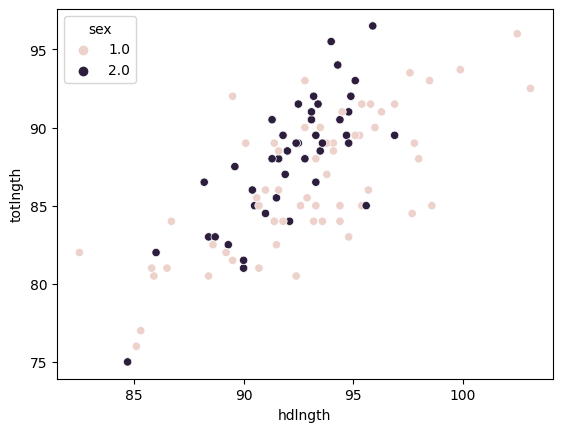

In [18]:
sns.scatterplot(data=data,x="hdlngth",y="totlngth",hue='sex')

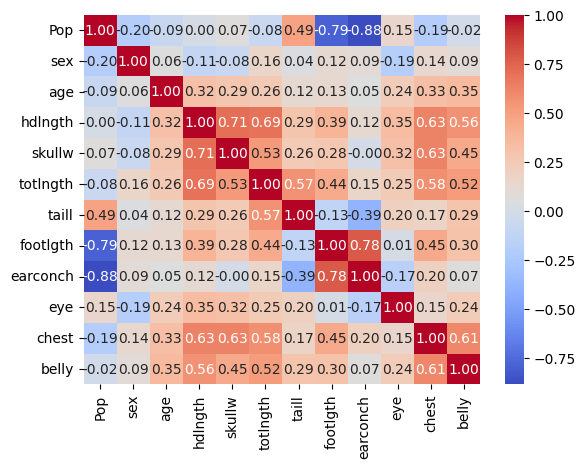

In [19]:
cor = data.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [20]:
data

,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0.0,1.0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,0.0,2.0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,0.0,2.0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,0.0,2.0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,0.0,2.0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,1.0,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,1.0,1.0,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,1.0,2.0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,1.0,1.0,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error
X = data.iloc[:,3:4]

y = data['totlngth']
X,y

(     hdlngth
 0       94.1
 1       92.5
 2       94.0
 3       93.2
 4       91.5
 ..       ...
 99      89.5
 100     88.6
 101     92.4
 102     91.5
 103     93.6
 
 [104 rows x 1 columns],
 0      89.0
 1      91.5
 2      95.5
 3      92.0
 4      85.5
        ... 
 99     81.5
 100    82.5
 101    89.0
 102    82.5
 103    89.0
 Name: totlngth, Length: 104, dtype: float64)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([85.63701347, 87.52556704, 81.53146223, 85.88334655, 80.46401891,
       85.63701347, 90.48156393, 83.33790478, 88.34667729, 89.00356549,
       87.52556704, 84.89801425, 85.3906804 , 95.07978132, 85.30856937,
       91.13845213, 87.77190012, 85.30856937, 87.68978909, 86.78656782,
       88.18245524])

In [25]:
X_test.size,y_test.size,X_train.size,y_train.size

(21, 21, 83, 83)

In [26]:
model.score(X_train,y_train)*100

44.97098877220315

In [27]:
model.score(X_test,y_test)*100

57.302485281165595

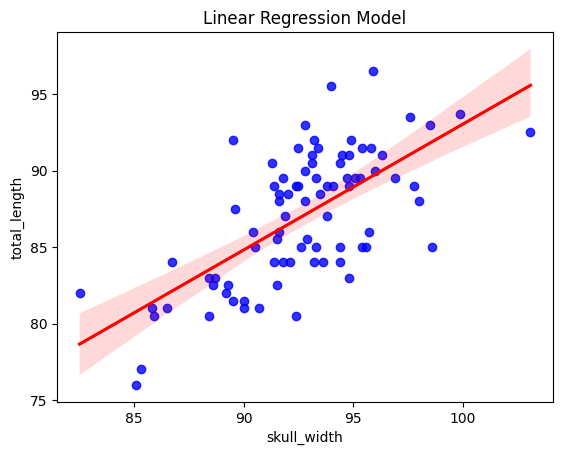

In [28]:
sns.regplot(x=X_train, y=y_train, data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('skull_width')
plt.ylabel('total_length')
plt.title('Linear Regression Model')
plt.show()

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [30]:
ridge.score(X_test,y_test)*100

57.30242032645516

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [32]:
lasso.score(X_test,y_test)*100

56.12332390991314

In [33]:
from sklearn.linear_model import ElasticNet
elas = ElasticNet()
elas.fit(X_train,y_train)

ElasticNet()

In [34]:
elas.score(X_test,y_test)*100

56.32857491936149

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
prams = {
    'alpha':[0,0.1,0.05,0.20,0.15],
    'l1_ratio':[0,0.1,0.2,0.15,0.25]
}

grid = GridSearchCV(elas,prams,cv=5,scoring='r2')
grid.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.307e+02, tolerance: 1.163e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0, 0.1, 0.05, 0.2, 0.15],
                         'l1_ratio': [0, 0.1, 0.2, 0.15, 0.25]},
             scoring='r2')

In [37]:
grid.best_params_

{'alpha': 0.2, 'l1_ratio': 0}

In [38]:
grid.score(X_test,y_test)*100

57.18277244723

In [39]:
grid.score(X_train,y_train)*100

44.959190636157174

In [40]:
best = grid.best_estimator_

In [41]:
from sklearn.metrics import mean_squared_error, r2_score , confusion_matrix , ConfusionMatrixDisplay ,accuracy_score

y_pred = best.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 8.119738639995816
R² Score: 0.5718277244723
